In [131]:
# Load Helpers

# Python Basic Tools
import pandas as pd
import numpy as np
import seaborn as sn
import os
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

# Sklearn Basic Tools
import sklearn.metrics
import sklearn.neighbors
from sklearn.model_selection import train_test_split

# Sklearn Regression and Classification Tools
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.svm import SVC
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.kernel_ridge import KernelRidge

# Usual cross-val tools and Grid searching 
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import ShuffleSplit
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit

# Set random seed
np.random.seed(47)

In [135]:
# Read Data
str_df = pd.read_csv("healthcare-dataset-stroke-data.csv")

In [63]:
str_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [64]:
str_df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [74]:
# Checking null values
null_count = str_df.isna().sum()
print(null_count);
print('\n> null count:', sum(str_df.isna().sum()));

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

> null count: 201


In [75]:
# Replace null value with column mean 
str_df= str_df.fillna(str_df.mean())
str_df


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,28.893237,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.000000,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.600000,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.600000,formerly smoked,0


In [136]:
str_df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


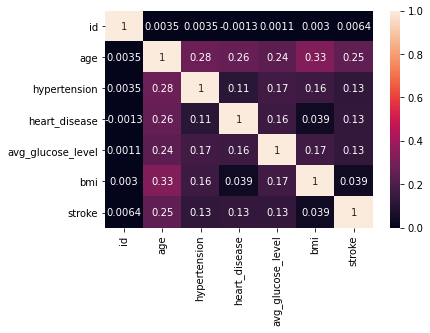

In [67]:
# Exploratory Analysis with Data Visualizations
corrMatrix = str_df.corr()
sn.heatmap(corrMatrix, annot=True)
plt.show()

In [76]:
# Convert category variables to dummy variables
str_df['ever_married'] = str_df['ever_married'].replace({'Yes':1,  'No':2})
str_df['work_type'] = str_df['work_type'].replace({'Self-employed':1,'Private':2, 'Never_worked':3, 'children':4, 'Govt_job':5})
str_df['gender'] = str_df['gender'].replace({ 'Male':1, 'Female':2 ,'Other':3})
str_df['Residence_type'] = str_df['Residence_type'].replace({'Rural':1,  'Urban':2})
str_df['smoking_status'] = str_df['smoking_status'].replace({'formerly smoked':1, 'smokes':2,'never smoked':3,'Unknown':4})
str_df



,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,1,67.0,0,1,1,2,2,228.69,36.600000,1,1
1,51676,2,61.0,0,0,1,1,1,202.21,28.893237,3,1
2,31112,1,80.0,0,1,1,2,1,105.92,32.500000,3,1
3,60182,2,49.0,0,0,1,2,2,171.23,34.400000,2,1
4,1665,2,79.0,1,0,1,1,1,174.12,24.000000,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,2,80.0,1,0,1,2,2,83.75,28.893237,3,0
5106,44873,2,81.0,0,0,1,1,2,125.20,40.000000,3,0
5107,19723,2,35.0,0,0,1,1,1,82.99,30.600000,3,0
5108,37544,1,51.0,0,0,1,2,1,166.29,25.600000,1,0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000002E5B0D00>,
      dtype=object)

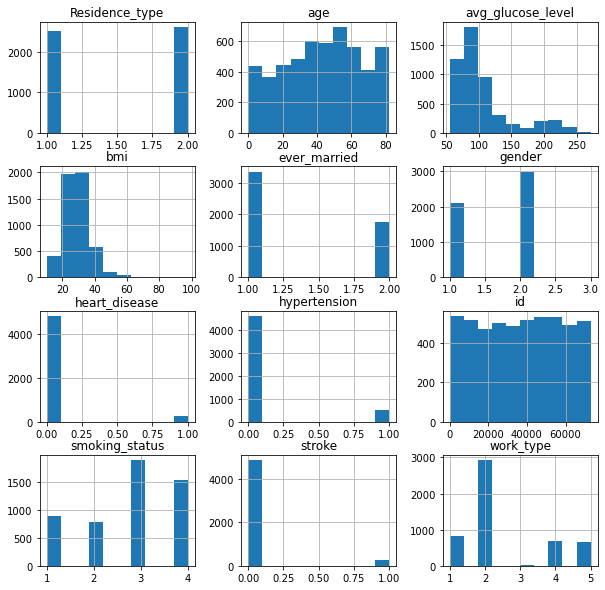

In [77]:
str_df.hist(figsize = (10,10))

In [97]:
#Explore data distribution within stroke patients

str_df1 = str_df[(str_df.stroke == 1)]
str_df1




,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,1,67.0,0,1,1,2,2,228.69,36.600000,1,1
1,51676,2,61.0,0,0,1,1,1,202.21,28.893237,3,1
2,31112,1,80.0,0,1,1,2,1,105.92,32.500000,3,1
3,60182,2,49.0,0,0,1,2,2,171.23,34.400000,2,1
4,1665,2,79.0,1,0,1,1,1,174.12,24.000000,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...
244,17739,1,57.0,0,0,1,2,1,84.96,36.700000,4,1
245,49669,2,14.0,0,0,2,4,1,57.93,30.900000,4,1
246,27153,2,75.0,0,0,1,1,1,78.80,29.300000,1,1
247,34060,1,71.0,1,0,1,1,1,87.80,28.893237,4,1


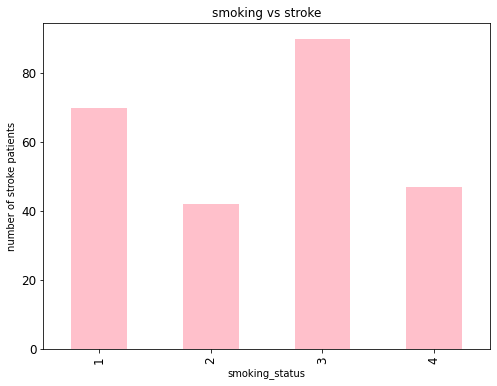

In [116]:
# smoking vs stroke
# 'formerly smoked':1, 'smokes':2,'never smoked':3,'Unknown':4
ax = str_df1[['smoking_status','stroke']].groupby(['smoking_status']).sum().plot(kind='bar', figsize=(8, 6),
                                       legend = False, title ="smoking vs stroke", 
                                       color='pink', fontsize=12)
ax.set_xlabel("smoking_status")
ax.set_ylabel("number of stroke patients")
plt.show()

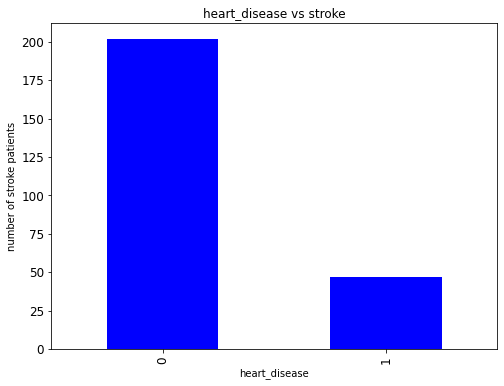

In [115]:
# heart_disease vs stroke
ax = str_df1[['heart_disease','stroke']].groupby(['heart_disease']).sum().plot(kind='bar', figsize=(8, 6),
                                       legend = False, title ="heart_disease vs stroke", 
                                       color='blue', fontsize=12)
ax.set_xlabel("heart_disease")
ax.set_ylabel("number of stroke patients")
plt.show()

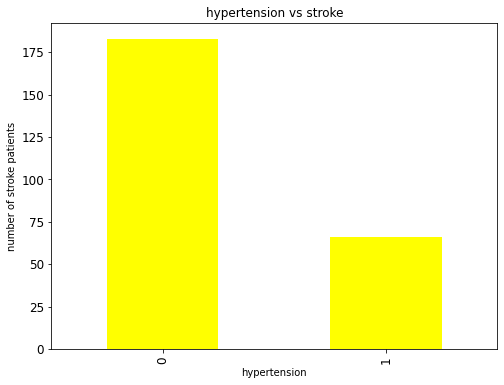

In [114]:
# hypertension vs stroke
ax = str_df1[['hypertension','stroke']].groupby(['hypertension']).sum().plot(kind='bar', figsize=(8, 6),
                                       legend = False, title ="hypertension vs stroke", 
                                       color='yellow', fontsize=12)
ax.set_xlabel("hypertension")
ax.set_ylabel("number of stroke patients")
plt.show()

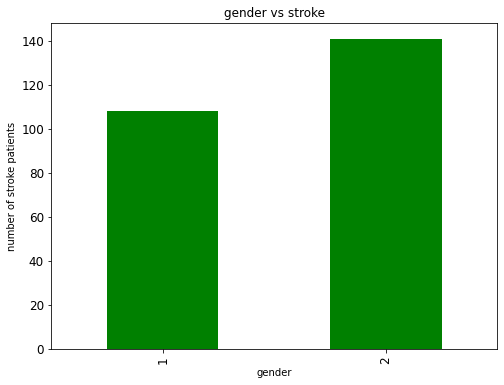

In [137]:
# gender vs stroke
ax = str_df1[['gender','stroke']].groupby(['gender']).sum().plot(kind='bar', figsize=(8, 6),
                                       legend = False, title ="gender vs stroke", 
                                       color='green', fontsize=12)
ax.set_xlabel("gender")
ax.set_ylabel("number of stroke patients")
plt.show()

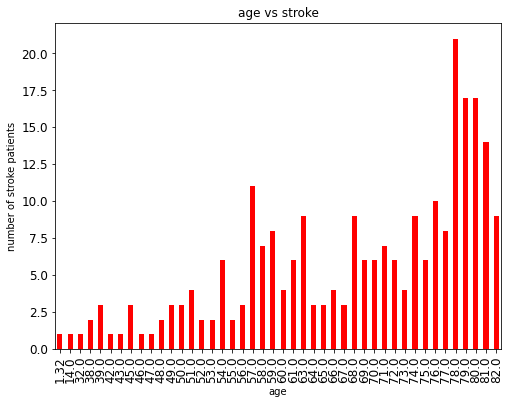

In [113]:
# age vs stroke
ax = str_df1[['age','stroke']].groupby(['age']).sum().plot(kind='bar', figsize=(8, 6),
                                       legend = False, title ="age vs stroke", 
                                       color='red', fontsize=12)
ax.set_xlabel("age")
ax.set_ylabel("number of stroke patients")
plt.show()

In [119]:
# A function to automate MC experiments
def MCtraintest(nmc,X,y,modelObj,testFrac):
    trainScore = np.zeros(nmc)
    testScore  = np.zeros(nmc)
    for i in range(nmc):
        X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=testFrac)
        modelObj.fit(X_train,y_train)
        trainScore[i] = modelObj.score(X_train,y_train)
        testScore[i]  = modelObj.score(X_test,y_test)
    return trainScore,testScore

In [121]:
# Seperate data with features and labels
X = str_df.drop('stroke', 1) #features
y = str_df['stroke']  #labels

# Split the dataframe into random train and test subsets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.5,random_state=47) #split by half

# Normalizing features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [122]:
# Linear regression

lrm = LinearRegression()
trainS, testS = MCtraintest(500,X,y,lrm,0.5)
print("Train/test R-squared:")
print(np.mean(trainS))
print(np.mean(testS))

Train/test R-squared:
0.08328934658306628
0.06966426506538924


In [125]:
# KNN

# grid research to find best k value
from sklearn.model_selection import GridSearchCV
param_grid = {'n_neighbors':np.arange(1,50)}
knn = KNeighborsClassifier()
knn_cv= GridSearchCV(knn,param_grid,cv=5)
knn_cv.fit(X,y)

print("Best Score:" + str(knn_cv.best_score_))
print("Best Parameters: " + str(knn_cv.best_params_))

Best Score:0.9514677103718199
Best Parameters: {'n_neighbors': 4}


In [126]:
# Apply best k-value with prediction
knn = KNeighborsClassifier(n_neighbors=4)#best k-value of 4
knn.fit(X_train,y_train)
trainS, testS = MCtraintest(100,X,y,knn,0.50)
print(np.mean(trainS))
print(np.mean(testS))

0.9514833659491194
0.9512485322896282


              precision    recall  f1-score   support

           0       0.95      1.00      0.97      2423
           1       0.00      0.00      0.00       132

    accuracy                           0.95      2555
   macro avg       0.47      0.50      0.49      2555
weighted avg       0.90      0.95      0.92      2555



Text(0.5, 15.0, 'Predicted label')

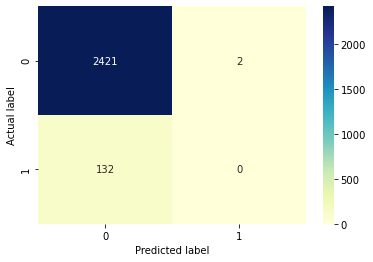

In [129]:
# Performance of KNN Classifier  based on classification report

y_test_pred = knn.predict(X_test)
y_train_pred = knn.predict(X_train)
from sklearn.metrics import classification_report
print(classification_report(y_test,y_test_pred))

# Performance of KNN Classifier based on confusion_matrix
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_test_pred)
p = sn.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [132]:
#SVC
# grid research to find best parameters 
pipe = Pipeline([("scaler", StandardScaler()),("nonlinsv", SVC())])
param_grid = {'nonlinsv__C':[0.25, 0.5, 0.75, 1.0, 1.5, 2.0], 'nonlinsv__gamma':  [0.0001,0.001,0.1,0.5,1.0,1.5,2.0], 'nonlinsv__kernel': ['rbf']}
        
# set up cross-validation shuffles
cv =ShuffleSplit(n_splits=100, test_size=0.5)
# set up search
grid_search = GridSearchCV(estimator=pipe, param_grid=param_grid, cv=cv)
# implement search
grid_search.fit(X,y)
# move results into DataFrame
results = pd.DataFrame(grid_search.cv_results_)
print(results[['rank_test_score','mean_test_score','param_nonlinsv__C','param_nonlinsv__gamma']])

    rank_test_score  mean_test_score param_nonlinsv__C param_nonlinsv__gamma
0                 1         0.951930              0.25                0.0001
1                 1         0.951930              0.25                 0.001
2                 1         0.951930              0.25                   0.1
3                 1         0.951930              0.25                   0.5
4                 1         0.951930              0.25                     1
5                 1         0.951930              0.25                   1.5
6                 1         0.951930              0.25                     2
7                 1         0.951930               0.5                0.0001
8                 1         0.951930               0.5                 0.001
9                 1         0.951930               0.5                   0.1
10                1         0.951930               0.5                   0.5
11                1         0.951930               0.5                     1

In [138]:
# Apply Best Parameters on SVC
fullModel = Pipeline([("scaler", StandardScaler()),("nonlinsv", SVC(kernel="rbf",C= 0.25,gamma= 0.0001))])
trainS, testS = MCtraintest(100,X,y,fullModel,0.5) #(100 iterations, 0.5 sample in test)
print(np.mean(testS))

0.951303326810176


D:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.95      1.00      0.97      2423
           1       0.00      0.00      0.00       132

    accuracy                           0.95      2555
   macro avg       0.47      0.50      0.49      2555
weighted avg       0.90      0.95      0.92      2555



Text(0.5, 15.0, 'Predicted label')

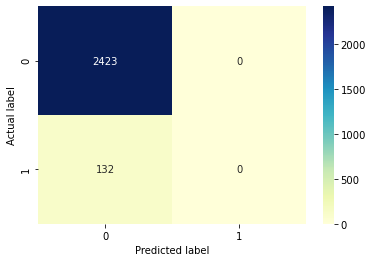

In [139]:
# Performance of SVC based on classification report

y_test_pred = fullModel.predict(X_test)
y_train_pred = fullModel.predict(X_train)
from sklearn.metrics import classification_report
print(classification_report(y_test,y_test_pred))

# Performance of SVC based on confusion_matrix
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_test_pred)
p = sn.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [133]:
# Random Forest
# Grid research to find best max_depth value and best n_estimators
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
param_grid = { 
    'n_estimators': list(range(1, 50)),
    'max_depth' : [5,10,15,20,25]}
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc.fit(X, y)
CV_rfc.best_params_

{'max_depth': 5, 'n_estimators': 10}

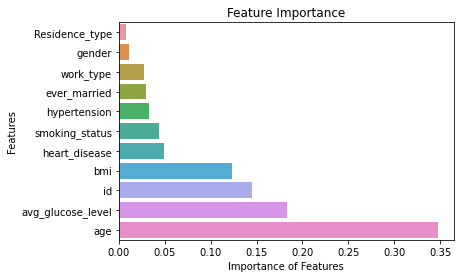

In [134]:
# Variable Importance with Random Forest Classifier

from sklearn.ensemble import RandomForestClassifier
rfc= RandomForestClassifier(n_estimators=10,max_depth=5)
rfc.fit(X_train,y_train)

feature_imp = pd.Series(rfc.feature_importances_,
                        index=X.columns).sort_values()

sn.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Importance of Features')
plt.ylabel('Features')
plt.title("Feature Importance")
plt.show()

In [140]:
# Apply Best Parameters on Random Forest
from sklearn.ensemble import RandomForestClassifier
rfc= RandomForestClassifier(n_estimators=10,max_depth=5)
trainS, testS = MCtraintest(100,X,y,rfc,0.5) #(100 iterations, 0.5 sample in test)
print(np.mean(testS))

0.9509784735812132
